<a href="https://colab.research.google.com/github/junpito/collections-of-college-task/blob/main/Praktikum_2%5Bdata_mining%5D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 

In [ ]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

In [ ]:
pip install -U scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


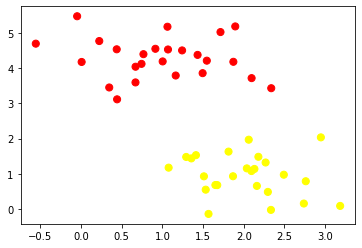

In [ ]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=50, centers=2,
 random_state=0, cluster_std=0.60)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn');

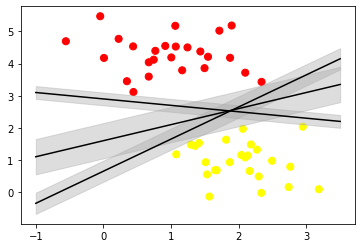

In [ ]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
for m, b, d in [(1, 0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]:
 yfit = m * xfit + b
 plt.plot(xfit, yfit, '-k')
 plt.fill_between(xfit, yfit - d, yfit + d, edgecolor='none',color='#AAAAAA', alpha=0.4)

In [ ]:
from sklearn.svm import SVC # "Support vector classifier"
model = SVC(kernel='linear', C=1E10)
model.fit(X, y)

SVC(C=10000000000.0, kernel='linear')

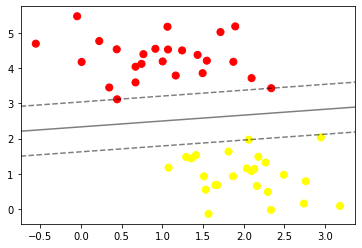

In [ ]:
def plot_svc_decision_function(model, ax=None, plot_support=True):
  if ax is None:
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

 # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)

    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
    levels=[-1, 0, 1], alpha=0.5,
    linestyles=['--', '-', '--'])

    if plot_support:
      ax.scatter(model.support_vectors_[:, 0],model.support_vectors_[:, 1],
    s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(model);

In [ ]:
model.support_vectors_

array([[0.44359863, 3.11530945],
       [2.33812285, 3.43116792],
       [2.06156753, 1.96918596]])

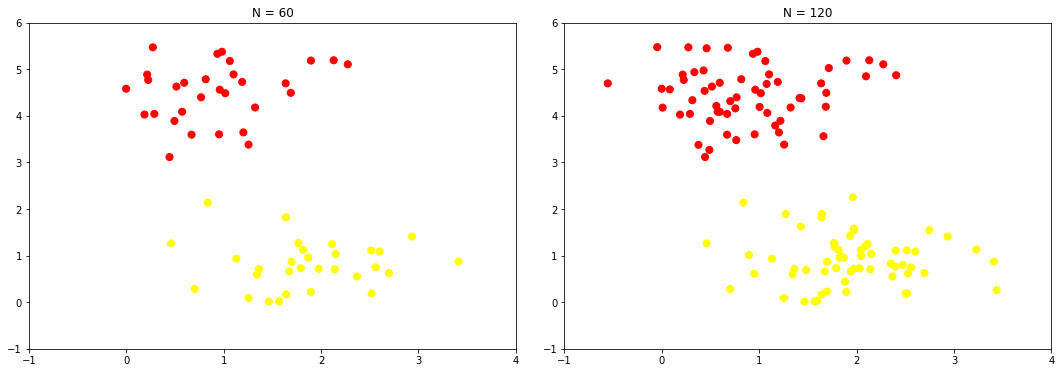

In [ ]:
def plot_svm(N=10, ax=None):
 X, y = make_blobs(n_samples=200, centers=2,
 random_state=0, cluster_std=0.60)
 X = X[:N]
 y = y[:N]
 model = SVC(kernel='linear', C=1E10)
 model.fit(X, y)

 ax = ax or plt.gca()
 ax.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
 ax.set_xlim(-1, 4)
 ax.set_ylim(-1, 6)
 plot_svc_decision_function(model, ax)
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)
for axi, N in zip(ax, [60, 120]):
 plot_svm(N, axi)
 axi.set_title('N = {0}'.format(N))

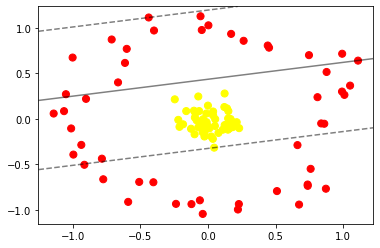

In [ ]:
from sklearn.datasets import make_circles
X, y = make_circles(100, factor=.1, noise=.1)
clf = SVC(kernel='linear').fit(X, y)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf, plot_support=False);

In [ ]:
clf = SVC(kernel='rbf', C=1E6)
clf.fit(X, y)

SVC(C=1000000.0)

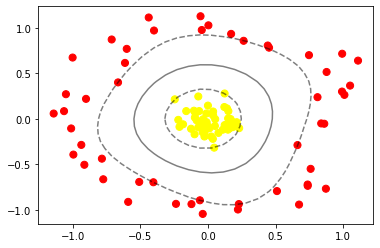

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
 s=300, lw=1, facecolors='none');

#latihan 2

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
df = pd.read_csv("/content/gdrive/MyDrive/praktikum/PRDECT-ID-Dataset1.csv")
df.head()

,Unnamed: 0,Category,Product Name,Location,Price,Overall Rating,Number Sold,Total Reviews,Customer Rating,Customer Reviews,Sentiment,Emotion
0,0,Computers and Laptops,Wireless Keyboard i8 Mini TouchPad Mouse 2.4G...,North Jakarta,53500,4.9,5449,2369,5,Thank God it's working fine. Safe packaging. ...,Positive,Happy
1,1,Computers and Laptops,WINDOWS 10 PRO AND OFFICE 2019 LICENSE PACK O...,South Tangerang City,72000,4.9,2359,1044,5,"good stuff and fast response, competitive pri...",Positive,Happy
2,2,Computers and Laptops,Midasforce SSD 128 Gb - No Caddy,West Jakarta,213000,5.0,12300,3573,5,"good item, works well, friendly seller, fast ...",Positive,Happy
3,3,Computers and Laptops,CHARGER MONITOR ADAPTER LCD LED TV LG brand L...,East Jakarta,55000,4.7,2030,672,5,good as expected the seller is also friendly....,Positive,Happy
4,4,Computers and Laptops,CHARGER MONITOR ADAPTER LCD LED TV LG brand L...,East Jakarta,55000,4.7,2030,672,5,"Good stuff, safe packaging, works well",Positive,Happy


import library


In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing,
import matplotlib.pyplot as plt # for data visualization
import seaborn as sb # for statistical data visualization
%matplotlib inline

Definisikan dataset, lalu tampilkan data dalam 10 baris atas dan 10 baris bawah.
Periksa berapa banyak jumlah kolom dan baris. Silahkan jawab pertanyaan berikut
dengan membuat skrip pemrograman di notebook Anda.

a. Berapa dimensi dataset? Dan berapa jumlah instance dan variable (fitur) dalam
dataset tersebut?

b. Tampilkan info dataset. Apa saja tipe data yang terkandung?

c. Periksa apakah terdapat data yang null atau data yang kosong 

In [ ]:
#a 
df.shape 


(5400, 12)

In [ ]:
#b 
df.info

<bound method DataFrame.info of       Unnamed: 0                Category  \
0              0   Computers and Laptops   
1              1   Computers and Laptops   
2              2   Computers and Laptops   
3              3   Computers and Laptops   
4              4   Computers and Laptops   
...          ...                     ...   
5395        5395               Household   
5396        5396               Household   
5397        5397               Household   
5398        5398               Household   
5399        5399               Household   

                                           Product Name  \
0      Wireless Keyboard i8 Mini TouchPad Mouse 2.4G...   
1      WINDOWS 10 PRO AND OFFICE 2019 LICENSE PACK O...   
2                      Midasforce SSD 128 Gb - No Caddy   
3      CHARGER MONITOR ADAPTER LCD LED TV LG brand L...   
4      CHARGER MONITOR ADAPTER LCD LED TV LG brand L...   
...                                                 ...   
5395        PCK-01 Pickup 

In [ ]:
df.isnull

<bound method DataFrame.isnull of       Unnamed: 0                Category  \
0              0   Computers and Laptops   
1              1   Computers and Laptops   
2              2   Computers and Laptops   
3              3   Computers and Laptops   
4              4   Computers and Laptops   
...          ...                     ...   
5395        5395               Household   
5396        5396               Household   
5397        5397               Household   
5398        5398               Household   
5399        5399               Household   

                                           Product Name  \
0      Wireless Keyboard i8 Mini TouchPad Mouse 2.4G...   
1      WINDOWS 10 PRO AND OFFICE 2019 LICENSE PACK O...   
2                      Midasforce SSD 128 Gb - No Caddy   
3      CHARGER MONITOR ADAPTER LCD LED TV LG brand L...   
4      CHARGER MONITOR ADAPTER LCD LED TV LG brand L...   
...                                                 ...   
5395        PCK-01 Picku

. Eksplorasi Data Analisis (Exploratory Data Analysis or EDA), Anda di beri
latihan berikut agar mendapatkan informasi penting terkait statistik dalam data lalu
memvisualisasikannya agar menjadi sajian data yang mudah dimengerti orang lain.

a. Gunakan fungsi value_counts() untuk menghitung jumlah data dari fitur :
Emotion, Sentiment, Category, Costumer Rating, dan Overall Rating

b. Berapa persentase distribusi dari jumlah data pada fitur : Emotion, Sentiment
dan Category. Costumer Rating, dan Overall Rating

c. Deskripsikan statistik dataset.

d. Visualisasikan boxplot dan skewnes dari fitur dengan tipe data numerik,
lanjutkan skrip pemrograman berikut. 

In [ ]:
df["Category"].value_counts()

 Computers and Laptops       200
 Kitchen                     200
 Health                      200
 Beauty                      200
 Camera                      200
 Mother and Baby             200
 Phones and Tablets          200
 Gaming                      200
 Movies and Music            200
 Women's Fashion             200
 Men's Fashion               200
 Muslim Fashion              200
 Kids and Baby Fashion       200
 Electronics                 200
 Books                       200
 Toys and Hobbies            200
 Sport                       200
 Other Products              200
 Carpentry                   200
 Party Supplies and Craft    200
 Body Care                   200
 Animal Care                 200
 Automotive                  200
 Office & Stationery         200
 Food and Drink              200
 Household                   200
 Tour and Travel              80
 Precious Metal               80
 property                     40
Name: Category, dtype: int64

In [ ]:
df[' Emotion'].value_counts()

 Happy      1770
 Sadness    1202
 Fear        920
 love        809
 Anger       699
Name:  Emotion, dtype: int64

In [ ]:
df[' Sentiment'].value_counts()

 negative    2821
 Positive    2579
Name:  Sentiment, dtype: int64

In [ ]:
df[' Customer Rating'].value_counts()

5    2150
1    1832
2     561
3     462
4     395
Name:  Customer Rating, dtype: int64

In [ ]:
df[' Overall Rating'].value_counts()

4.9    2625
4.8    1256
5.0     737
4.7     530
4.6     184
4.5      28
4.4      26
4.3       9
4.2       4
4.1       1
Name:  Overall Rating, dtype: int64

In [ ]:
#percentance

In [ ]:
persen1 = df[' Emotion'].value_counts().mul(100).round(1).astype(str) + '%'
persen2 = df[' Sentiment'].value_counts().mul(100).round(1).astype(str) + '%'
persen3 = df[' Customer Rating'].value_counts().mul(100).round(1).astype(str) + '%'
persen4 = df[' Overall Rating'].value_counts().mul(100).round(1).astype(str) + '%'
persen1


 Happy      177000%
 Sadness    120200%
 Fear        92000%
 love        80900%
 Anger       69900%
Name:  Emotion, dtype: object

In [ ]:
persen2

 negative    282100%
 Positive    257900%
Name:  Sentiment, dtype: object

In [ ]:
persen3

5    215000%
1    183200%
2     56100%
3     46200%
4     39500%
Name:  Customer Rating, dtype: object

In [ ]:
persen4

4.9    262500%
4.8    125600%
5.0     73700%
4.7     53000%
4.6     18400%
4.5      2800%
4.4      2600%
4.3       900%
4.2       400%
4.1       100%
Name:  Overall Rating, dtype: object

In [ ]:
#dsek dataset
df.describe()

,Unnamed: 0,Price,Overall Rating,Number Sold,Total Reviews,Customer Rating
count,5400.000000,5.400000e+03,5400.000000,5400.000000,5400.000000,5400.000000
mean,2699.500000,2.386961e+05,4.854389,15961.951852,2168.645556,3.087037
std,1558.990058,8.016337e+05,0.108259,74201.913338,2915.666035,1.766258
min,0.000000,1.000000e+02,4.100000,9.000000,4.000000,1.000000
25%,1349.750000,2.000000e+04,4.800000,1630.000000,576.000000,1.000000
50%,2699.500000,5.990000e+04,4.900000,3794.500000,1192.000000,3.000000
75%,4049.250000,1.500000e+05,4.900000,9707.000000,2582.000000,5.000000
max,5399.000000,1.539900e+07,5.000000,1000000.000000,24500.000000,5.000000


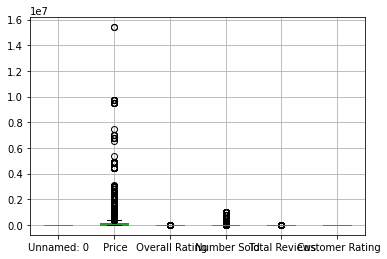

In [ ]:
df.boxplot()

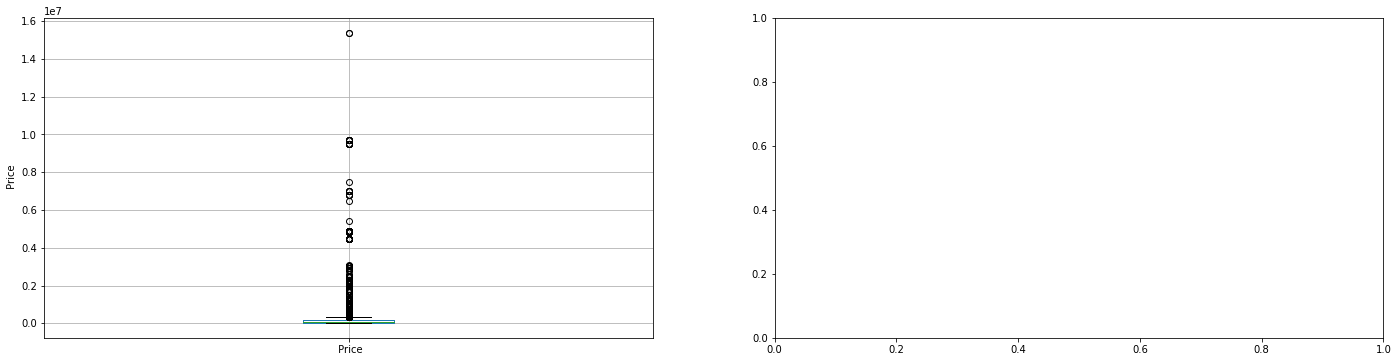

In [ ]:
plt.figure(figsize=(24,20))
plt.subplot(3, 2, 1)
fig = df.boxplot(column=' Price')
fig.set_title('')
fig.set_ylabel(' Price')
plt.subplot(3, 2, 2)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Skewness:  8.815659677009789
Kurtosis:  103.41795003858174


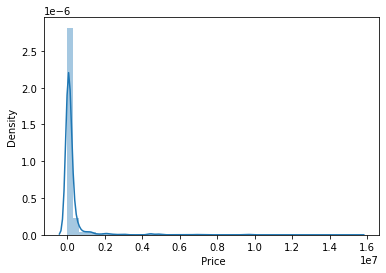

In [ ]:
sb.distplot(df[' Price'])
print("Skewness: ", df[' Price'].skew())
print("Kurtosis: ", df[' Price'].kurt())

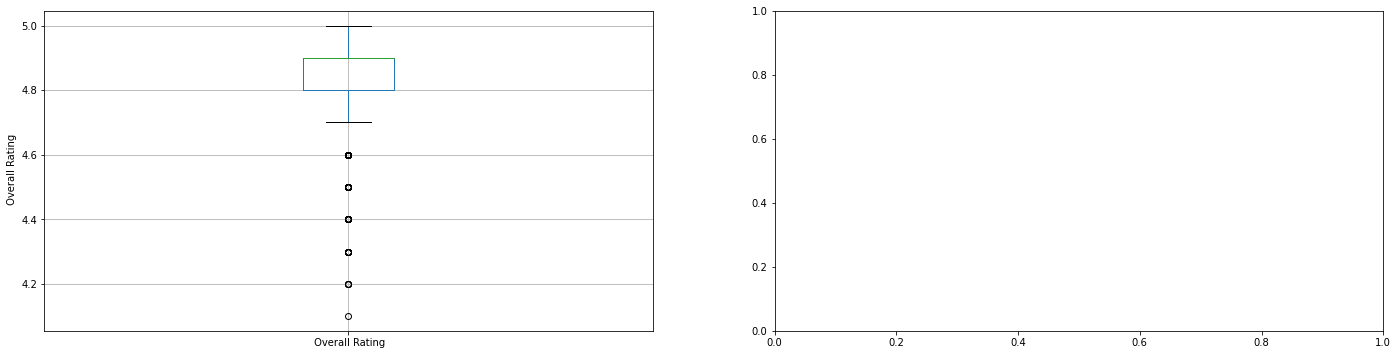

In [ ]:
plt.figure(figsize=(24,20))
plt.subplot(3, 2, 1)
fig = df.boxplot(column=' Overall Rating')
fig.set_title('')
fig.set_ylabel(' Overall Rating')
plt.subplot(3, 2, 2)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Skewness:  -1.3765826860809653
Kurtosis:  3.590036824214169


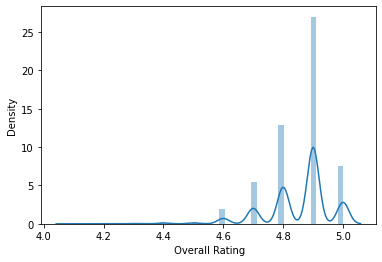

In [ ]:
sb.distplot(df[' Overall Rating'])
print("Skewness: ", df[' Overall Rating'].skew())
print("Kurtosis: ", df[' Overall Rating'].kurt())

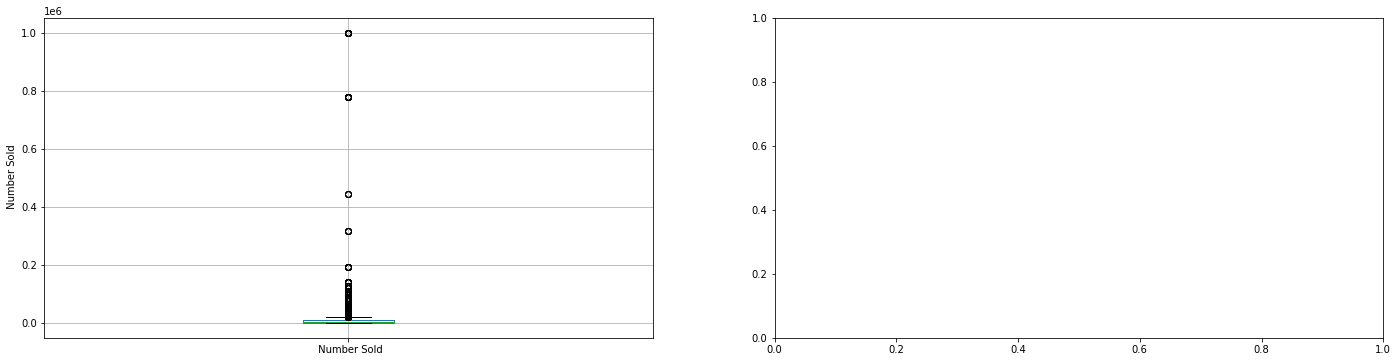

In [ ]:
plt.figure(figsize=(24,20))
plt.subplot(3, 2, 1)
fig = df.boxplot(column=' Number Sold')
fig.set_title('')
fig.set_ylabel(' Number Sold')
plt.subplot(3, 2, 2)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Skewness:  11.015313494989744
Kurtosis:  130.54308335466735


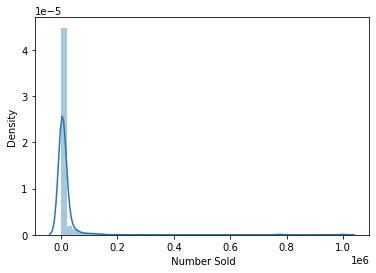

In [ ]:
sb.distplot(df[' Number Sold'])
print("Skewness: ", df[' Number Sold'].skew())
print("Kurtosis: ", df[' Number Sold'].kurt())

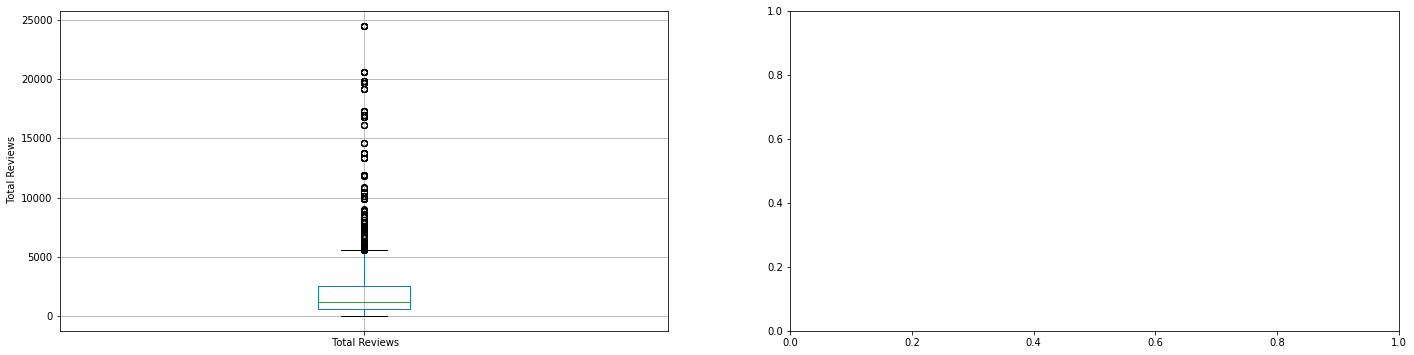

In [ ]:
plt.figure(figsize=(24,20))
plt.subplot(3, 2, 1)
fig = df.boxplot(column=' Total Reviews')
fig.set_title('')
fig.set_ylabel(' Total Reviews')
plt.subplot(3, 2, 2)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Skewness:  3.7321364896187306
Kurtosis:  18.281855206832407


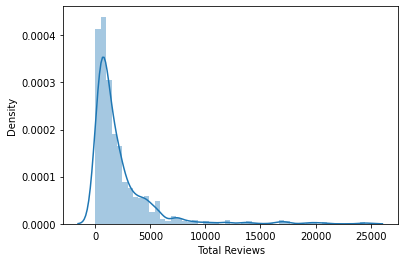

In [ ]:
sb.distplot(df[' Total Reviews'])
print("Skewness: ", df[' Total Reviews'].skew())
print("Kurtosis: ", df[' Total Reviews'].kurt())

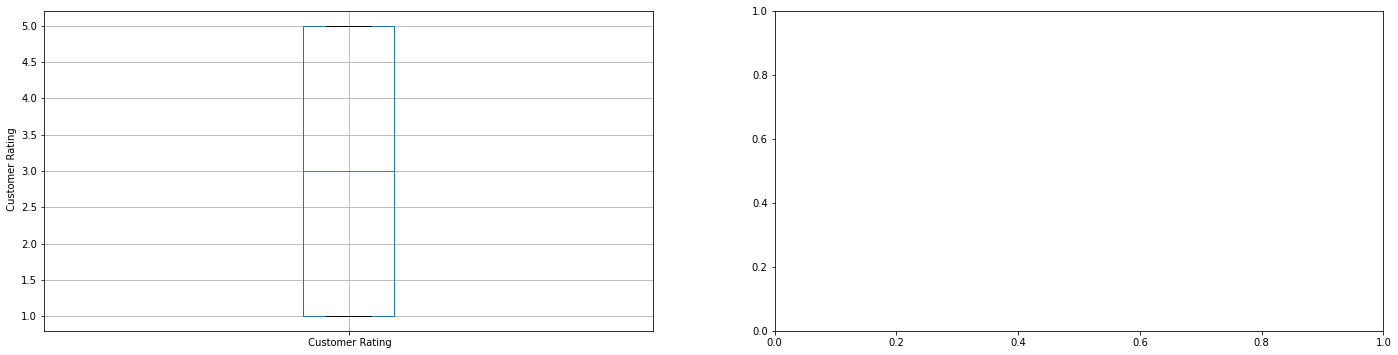

In [ ]:
plt.figure(figsize=(24,20))
plt.subplot(3, 2, 1)
fig = df.boxplot(column=' Customer Rating')
fig.set_title('')
fig.set_ylabel(' Customer Rating')
plt.subplot(3, 2, 2)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Skewness:  -0.06804300858265651
Kurtosis:  -1.7707495893589582


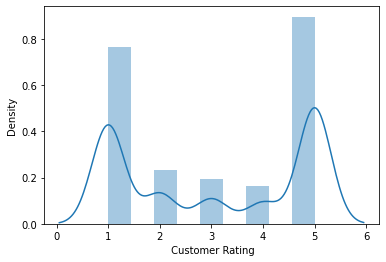

In [ ]:
sb.distplot(df[' Customer Rating'])
print("Skewness: ", df[' Customer Rating'].skew())
print("Kurtosis: ", df[' Customer Rating'].kurt())

analisis skewwness bertujuan memeriksa distribusi normal data. 

e. Buatlah plot distribusi dari Emotion dan Sentiment dengan fungsi berikut: 

In [ ]:
def distribution_plot(x, y, name):
 sb.barplot(x=x, y=y)
 plt.title(name)
 plt.show()


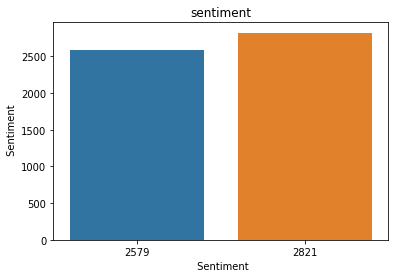

In [ ]:
 dist_x = df[' Sentiment'].value_counts()
 dist_y = df[' Sentiment'].value_counts()

distribution_plot(dist_x, dist_y, name="sentiment")

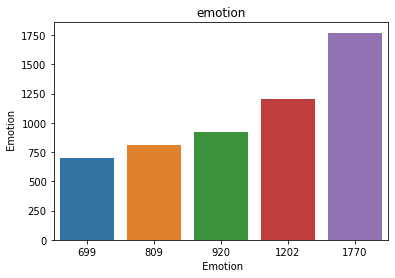

In [ ]:
 dist_x = df[' Emotion'].value_counts()
 dist_y = df[' Emotion'].value_counts()

distribution_plot(dist_x, dist_y, name="emotion")

f. Buatlah histogram dari fitur Overal Rating dan Customer Review dengan
fungsi sb.histplot. Berapa jumlah dari masing-masing nilai variabel x?

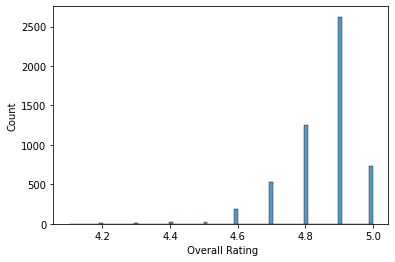

In [ ]:
sb.histplot(df[' Overall Rating'])

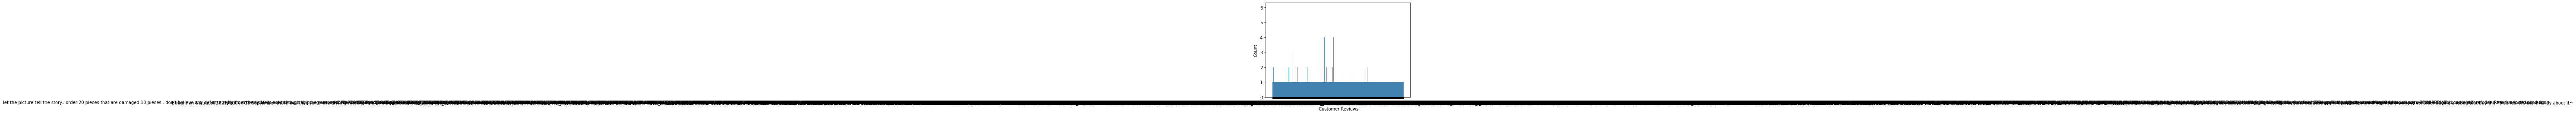

In [ ]:
sb.histplot(df[' Customer Reviews'])

###5

In [ ]:
import nltk
import re
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [ ]:
from nltk.stem.porter import *

In [ ]:
# Cleaning the reviews
corpus = []
for i in range(0,5400):
 # Cleaning special character from the reviews
 review = re.sub(pattern='[^a-zA-Z]',repl=' ',
string=df[' Customer Reviews'][i])
 # Converting the entire review into lower case
 review = review.lower()
 # Tokenizing the review by words
 review_words = review.split()
 # Removing the stop words
 review_words = [word for word in review_words if not word in set(stopwords.words('english'))]
 # Stemming the words
 ps = PorterStemmer()
 review = [ps.stem(word) for word in review_words]
 # Joining the stemmed words
 review = ' '.join(review)
 # Creating a corpus
 corpus.append(review)

In [ ]:
# Creating the Bag of Words model
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=1500)
X = cv.fit_transform(corpus).toarray()
y = df.iloc[:, 10].values

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((4050, 1500), (1350, 1500), (4050,), (1350,))

In [ ]:
from sklearn.svm import SVC
svc = SVC(kernel='linear', C=1, probability=True)
svc.fit(X_train, y_train)
y_pred=svc.predict(X_test)

In [ ]:
#menampilkan classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    Positive       0.87      0.87      0.87       637
    negative       0.89      0.89      0.89       713

    accuracy                           0.88      1350
   macro avg       0.88      0.88      0.88      1350
weighted avg       0.88      0.88      0.88      1350



In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.88

In [ ]:
from sklearn.metrics import f1_score
f1_score(y_test, y_pred, average=None)

array([0.87264151, 0.88655462])

Text(69.0, 0.5, 'Truth')

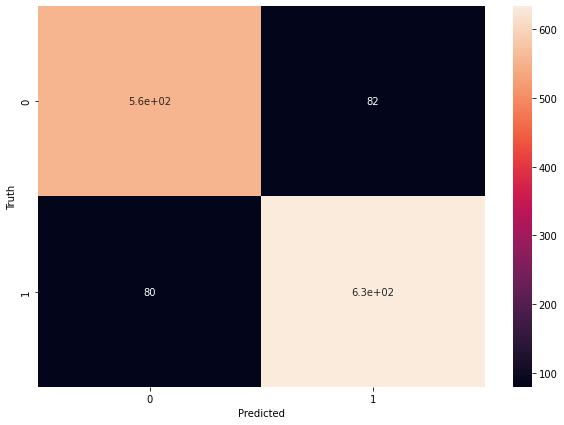

In [ ]:
from sklearn.metrics import confusion_matrix

#mengimplementasikan testing data dan hasil prediksi dalam confusion matrix
cm = confusion_matrix(y_test, y_pred)
 
#membuat plotting confusion matrix
%matplotlib inline
plt.figure (figsize=(10,7))
sb.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

###6

Buat juga model dengan kernel yang berbeda, seperti ‘rbf’ dan nilai C yang berbeda.
Silahkan buat analisis Anda mengapa hasil metrik evaluasi nya berbeda dari kernel
linear? Model mana yang mempunyai akurasi tertinggi?

In [ ]:
svc = SVC(kernel='rbf', C=1E6)
svc.fit(X_train, y_train)
y_pred=svc.predict(X_test)

In [ ]:
#menampilkan classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    Positive       0.87      0.87      0.87       637
    negative       0.89      0.89      0.89       713

    accuracy                           0.88      1350
   macro avg       0.88      0.88      0.88      1350
weighted avg       0.88      0.88      0.88      1350



In [ ]:
svc = SVC(kernel='rbf', C=230)
svc.fit(X_train, y_train)
y_pred=svc.predict(X_test)

In [ ]:
#menampilkan classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    Positive       0.87      0.87      0.87       637
    negative       0.88      0.89      0.89       713

    accuracy                           0.88      1350
   macro avg       0.88      0.88      0.88      1350
weighted avg       0.88      0.88      0.88      1350



Kernel Trick atau trik kernel adalah metode sederhana yang dipakai untuk memetakan data non-linear berdimensi rendah dan mengubahnya ke dalam ruang dimensi yang lebih tinggi. Tujuannya untuk memudahkan pengklasifikasian data dengan menemukan hyperplane yang dapat memisahkan dataset secara linear dengan baik. Dari percobaan 3 jenis kernel, accuracy paling tinggi dicapai ketika menggunakan kernel linear, yaitu 0.58.